In [156]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [157]:
df = pd.read_csv('btc-eth-prices-outliers.csv', index_col='Timestamp', parse_dates=True)
df

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


<Axes: xlabel='Timestamp'>

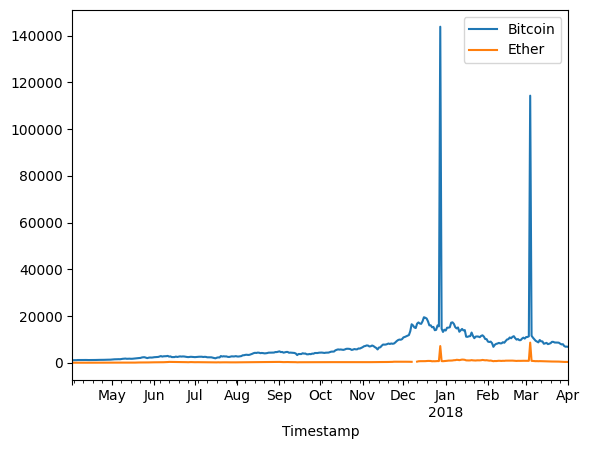

In [158]:
df.plot()

<Axes: xlabel='Timestamp'>

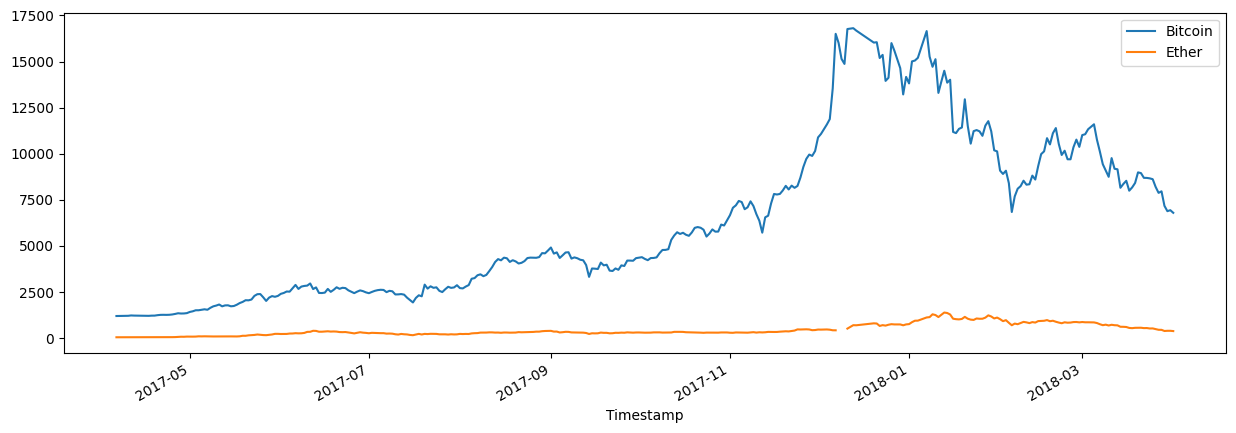

In [159]:
df_new = df[
    (df['Bitcoin'] >= df['Bitcoin'].quantile(0.025)) &
    (df['Bitcoin'] <= df['Bitcoin'].quantile(0.975))
]
df_new.plot(figsize=(15,5))

Text(0.5, 1.0, 'Bitcoin $ Ether Price throught time')

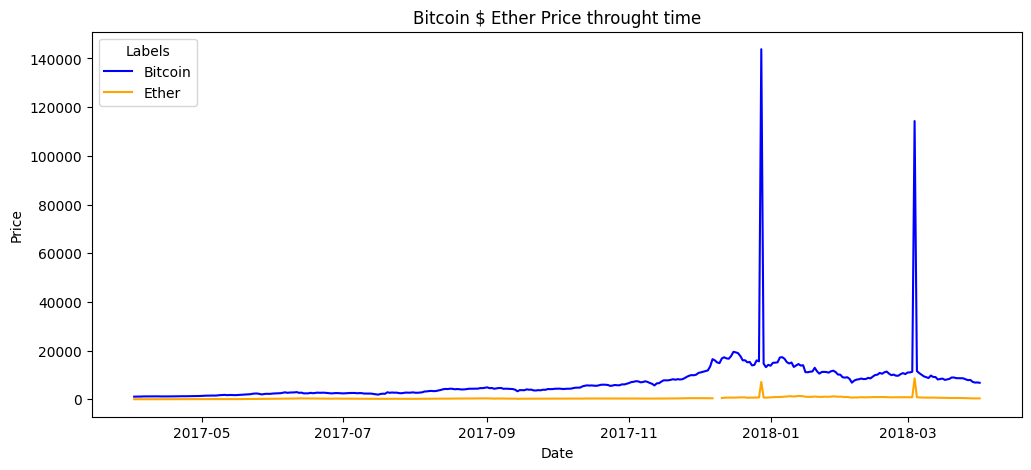

In [160]:
fig,ax = plt.subplots(figsize = (12,5))
ax.plot(df['Bitcoin'], color='blue', label='Bitcoin')
ax.plot(df['Ether'], color='orange', label='Ether')
ax.legend(title='Labels', loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Bitcoin $ Ether Price throught time')

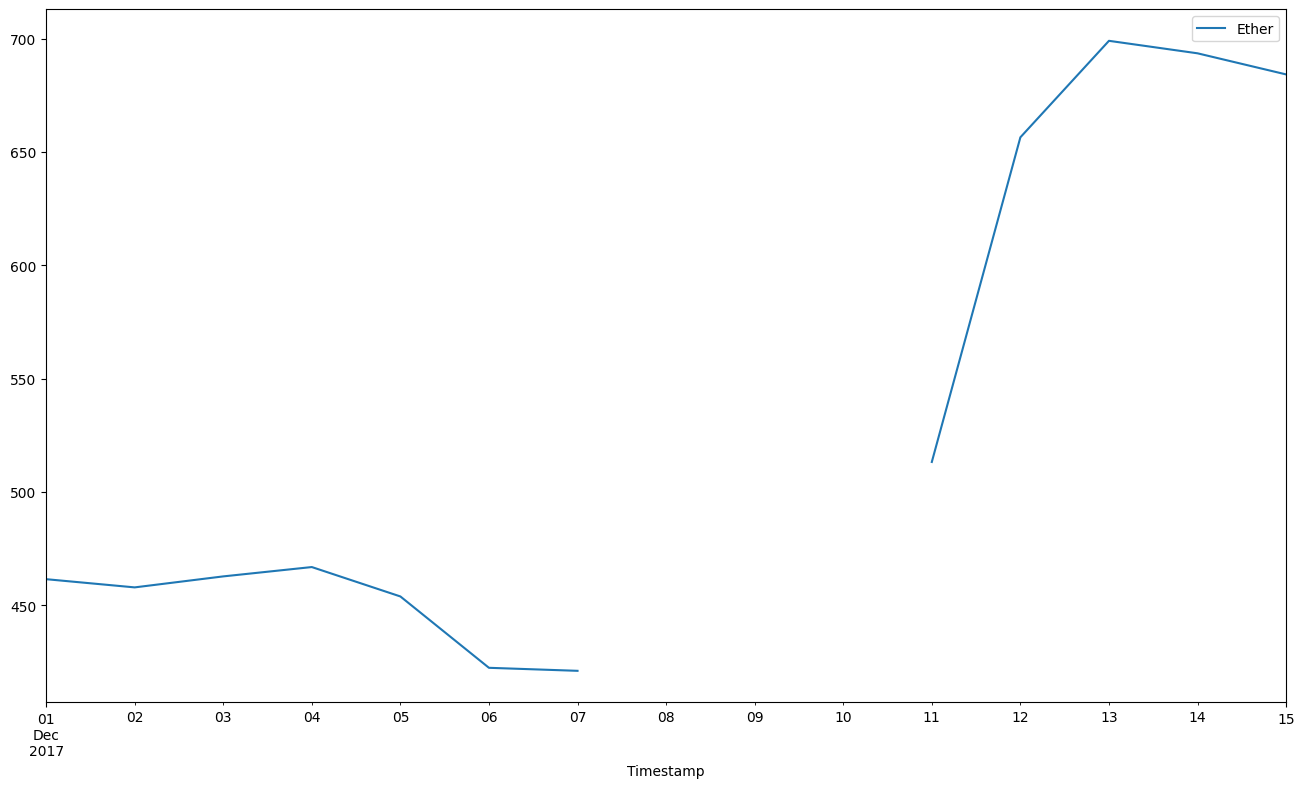

In [161]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))
df_na= df.loc['2017-12': '2017-12-15']

In [162]:
# Are those null values?
df_na['Ether'].isna().values.any()

True

In [163]:
# when? what periods of time?
df_na[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [164]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [165]:
df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6360\348566796.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [166]:
df.fillna(method='bfill', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6360\3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


<Axes: xlabel='Timestamp'>

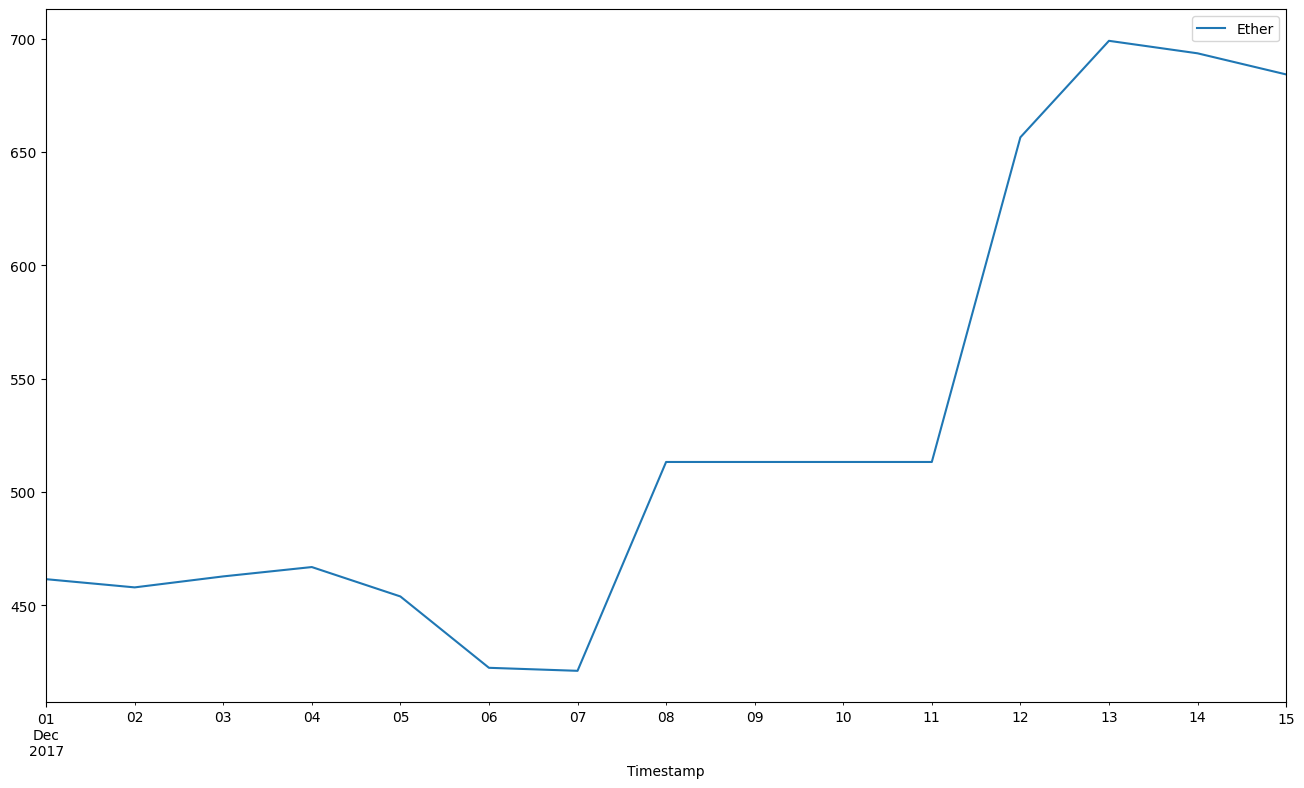

In [167]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [168]:
# Both values seem too high. That's because the outliers are skewing with the mean:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [169]:
df_new.mean()

Bitcoin    6199.363562
Ether       430.601725
dtype: float64

In [170]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [171]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

In [172]:
# mode
# It doesn't make much sense to measure the mode, as we have continuous values. But you can do it just with df.mode().
df.mode()

,Bitcoin,Ether
0,1099.169125,513.29
1,1133.079314,NaN
2,1141.600363,NaN
3,1141.813000,NaN
4,1180.023713,NaN
...,...,...
360,18961.856667,NaN
361,19289.785000,NaN
362,19498.683333,NaN
363,114301.816667,NaN


Visualizing distribution
##Now we can use a few of the charts that we saw before + seaborn to visualize the distribution of our values. In particular, we're interested in histograms:

In [173]:
number_of_beans = np.sqrt(len(df_cleaned))
print(number_of_beans)

19.05255888325765


<Axes: ylabel='Frequency'>

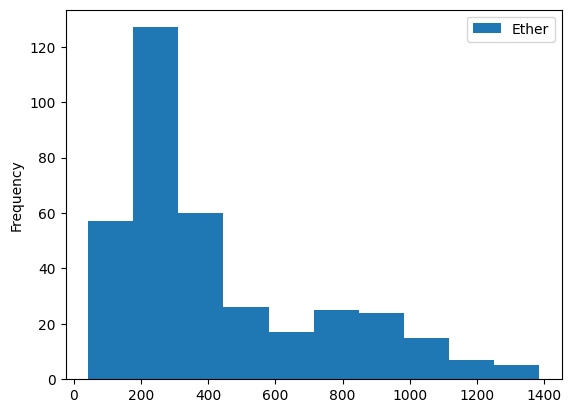

In [174]:
df_cleaned.plot(kind='hist', y='Ether')

<Axes: ylabel='Frequency'>

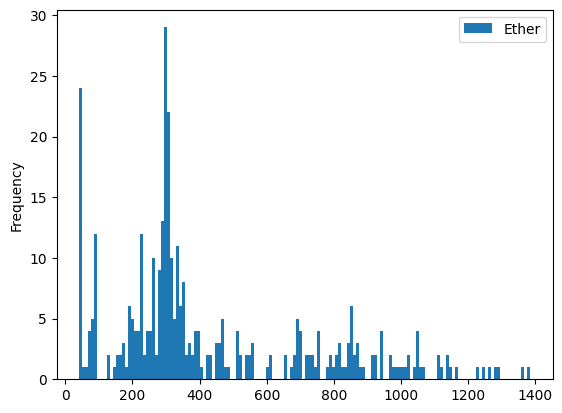

In [175]:
# bins are the number of class 
df_cleaned.plot(kind='hist', y='Ether', bins=150)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6360\3631238516.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Ether'], ax=ax, rug=True, bins=20)


<Axes: xlabel='Ether', ylabel='Density'>

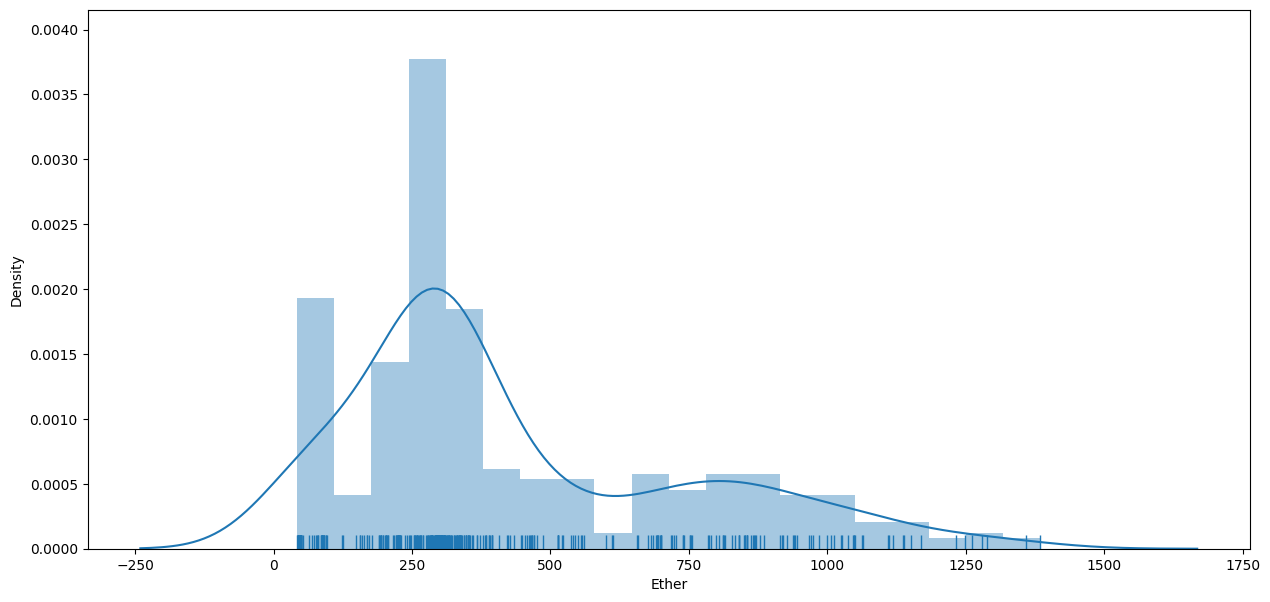

In [176]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax, rug=True, bins=20)

Seaborn's distplot is a general method that will plot a histogram, a KDE and a rugplot. You can also use them as separate:

C:\Users\Admin\AppData\Local\Temp\ipykernel_6360\2840864412.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='Bitcoin', ylabel='Density'>

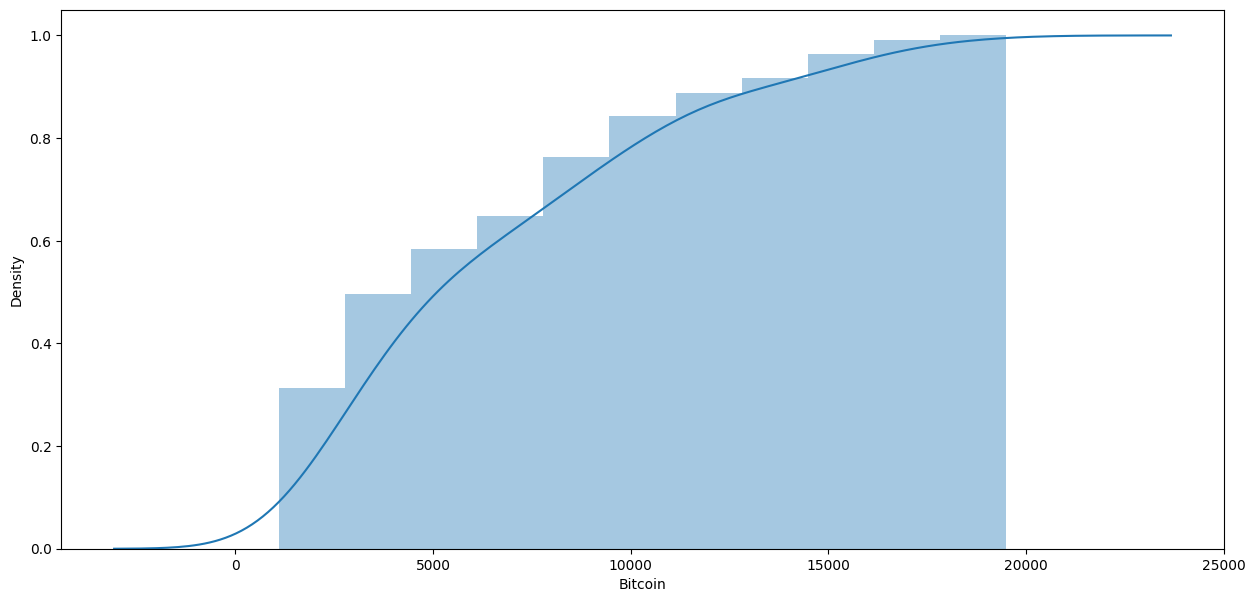

In [177]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(
    df_cleaned["Bitcoin"],
    ax=ax,
    hist_kws=dict(cumulative=True),
    kde_kws=dict(cumulative=True),
)

# Visualizing bivariate distributions
The most common way to observe a bivariate distribution is a scatterplot, the jointplot will also include the distribution of the variables:

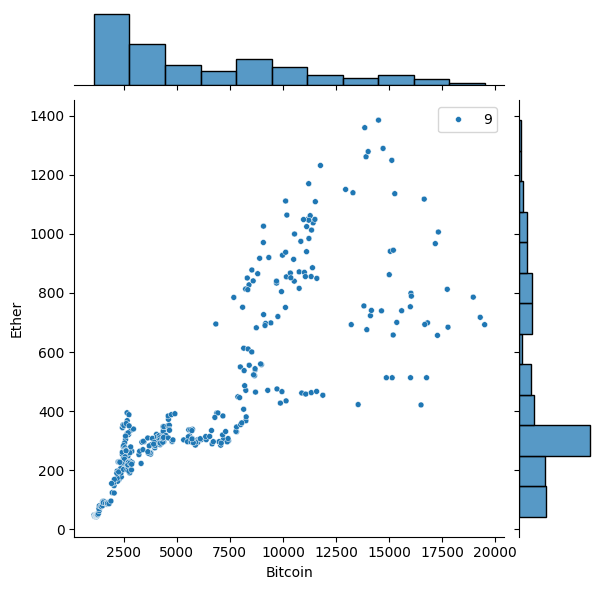

In [178]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, size=9)

If you want only a scatter plot, you can use the regplot method, that also fits a linear regression model in the plot:

<Axes: xlabel='Bitcoin', ylabel='Ether'>

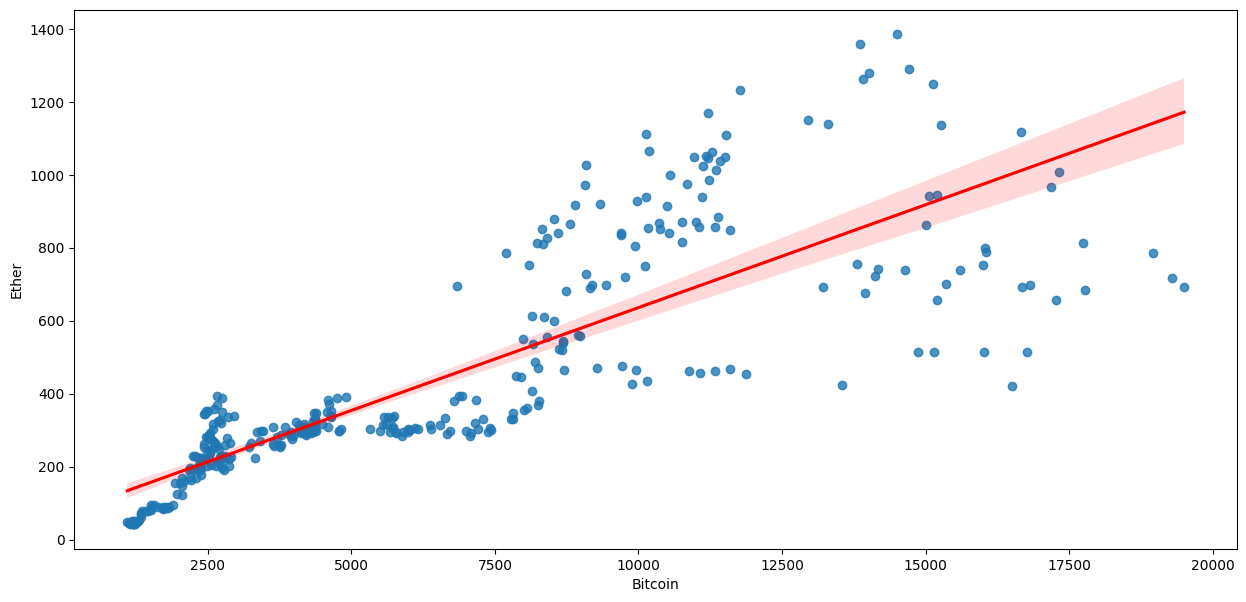

In [179]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax, line_kws={"color": "red"})

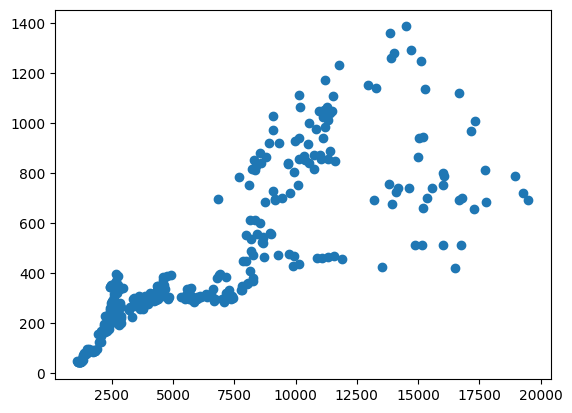

In [180]:
x = df_cleaned['Bitcoin']
y = df_cleaned['Ether']
fig , ax = plt.subplots()
plt.scatter(x, y)

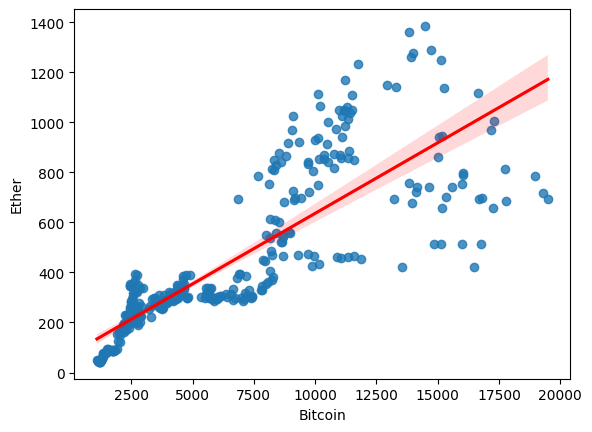

In [181]:
sns.regplot(x=df_cleaned["Bitcoin"], 
            y=df_cleaned["Ether"], 
            line_kws={"color": "red"})
plt.show()

#Quantiles, quartiles and percentiles

In [182]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

C:\Users\Admin\AppData\Local\Temp\ipykernel_6360\1559582923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,


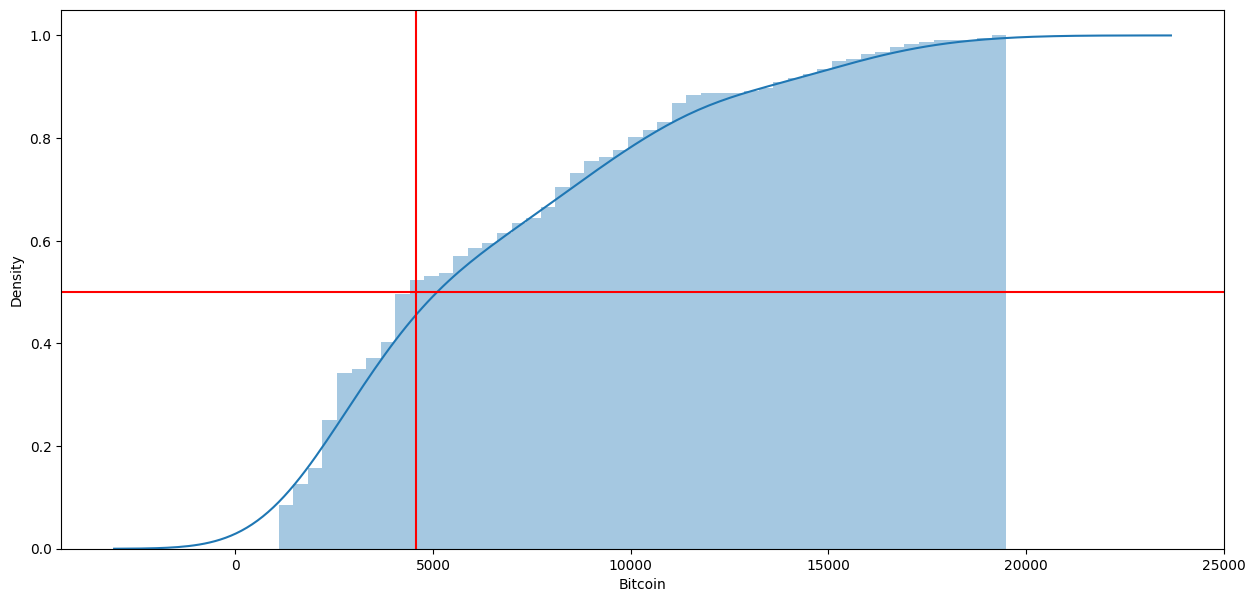

In [183]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red')

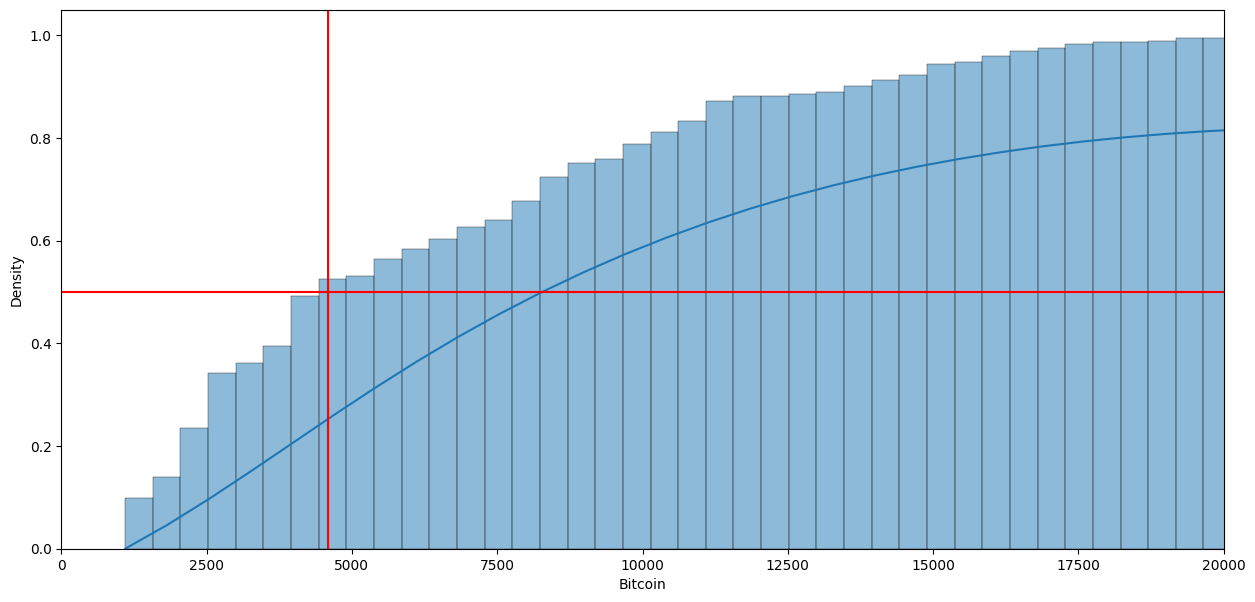

In [184]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df["Bitcoin"], kde=True, cumulative=True, stat='density', ax=ax, bins=300)
ax.set_xlim([0, 20000])
ax.axhline(0.5, color='red')

ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red')

Quantile 0.25 == Percentile 25% == Quartile 1st

Dispersion
We'll use a few methods to measure dispersion in our dataset, most of them well known:

Range
Variance and Standard Deviation
IQR
Range
Range is fairly simple to understand, it's just the max - min values:

In [185]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

Variance and Standard Deviation

In [186]:
df_cleaned['Bitcoin'].var()

20374008.236050833

In [187]:
df_cleaned['Bitcoin'].std()

4513.757662530282

The Interquartile range is a good measure of "centered" dispersion, and is calculated as Q3 - Q1 (3rd quartile - 1st quartile).

In [188]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

As you can see, IQR is more robust than std or range, because it's not so sensitive to outliers.

Analytical Analysis of invalid values
We can now use the measurements we've seen to analyze those values that seem invalid.

Using std: Z scores
We can now define those values that are a couple of Z scores above or below the mean (or the max/min value). Example:

In [189]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [190]:
print(f"Upper Value = {upper_limit}", f"\n", f"Lower Value = {lower_limit}")

Upper Value = 27369.17635730169 
 Lower Value = -13377.16831365621


C:\Users\Admin\AppData\Local\Temp\ipykernel_6360\1109975596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bitcoin'], ax=ax)


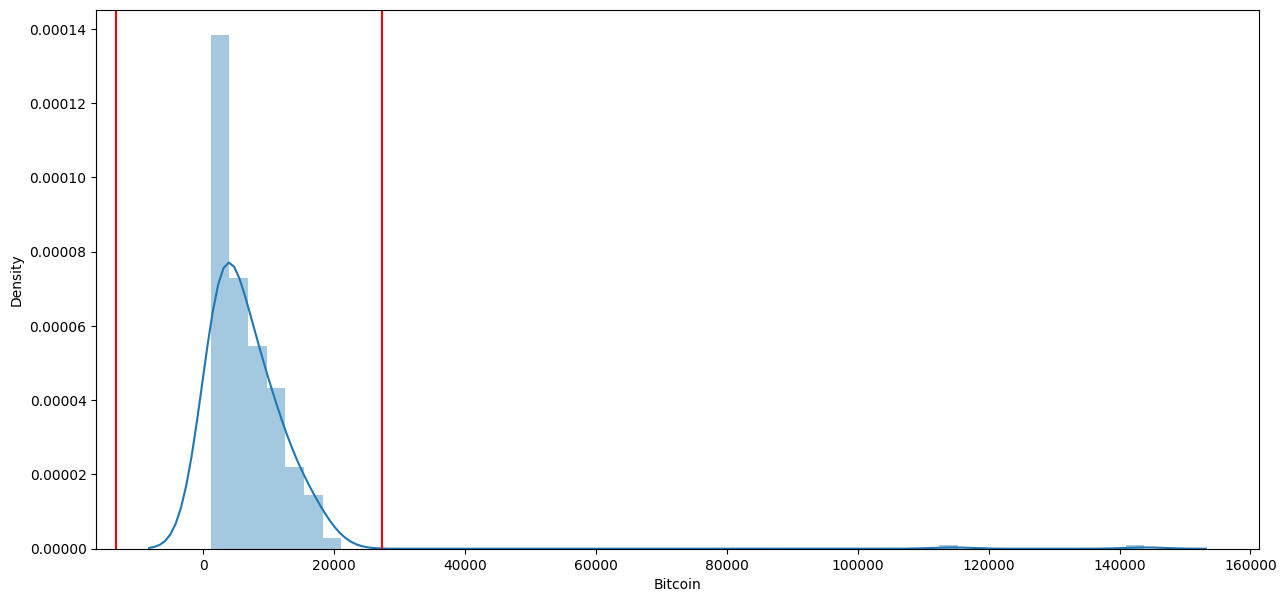

In [191]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Cleaning invalid values analytically
It's time now to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:

<Axes: xlabel='Timestamp'>

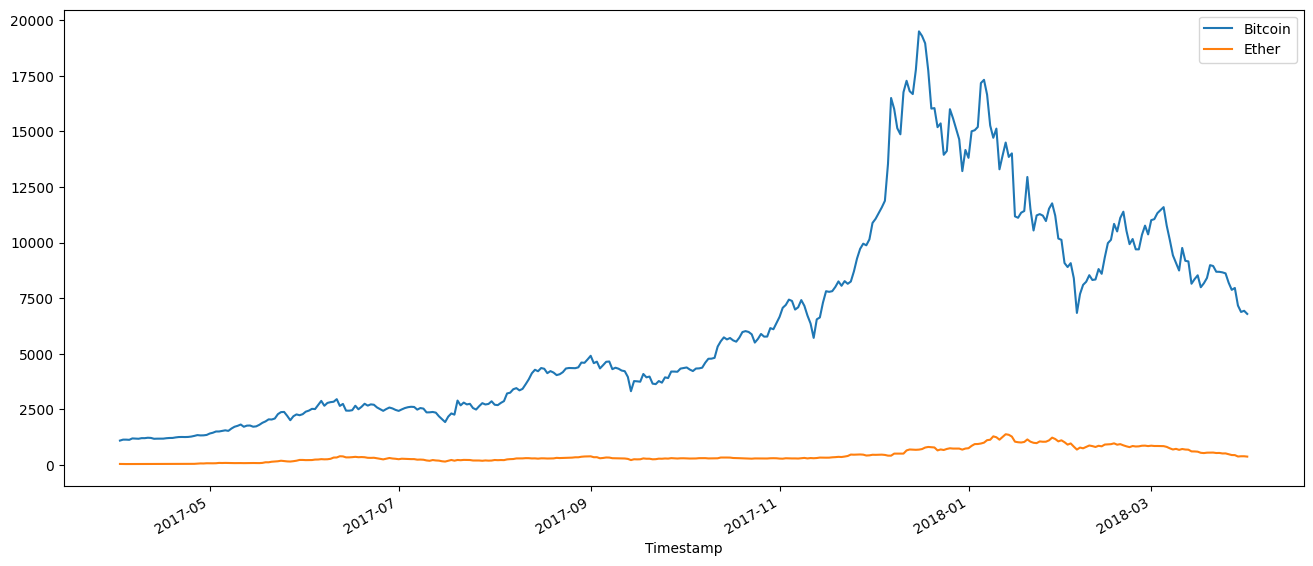

In [192]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

<Axes: xlabel='Timestamp'>

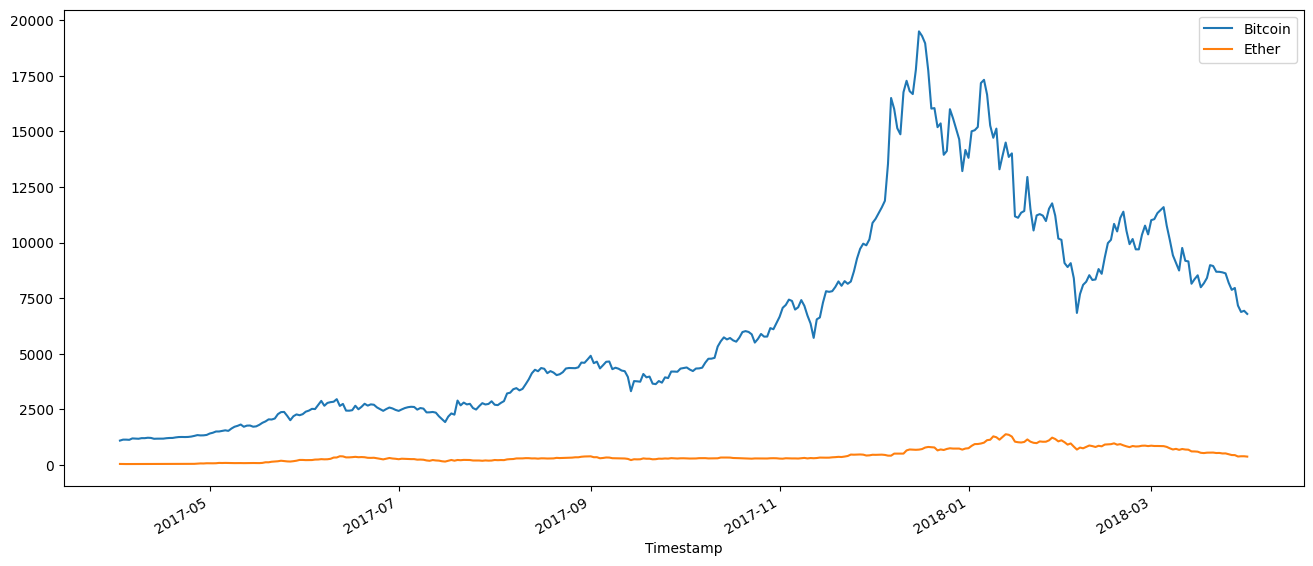

In [193]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))

In [216]:
df_bar = df_cleaned.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar1 = df_bar.groupby(['year', 'month'])['Bitcoin'].mean().unstack()
df_bar2 = df_bar.groupby(['year', 'month'])['Ether'].mean().unstack()


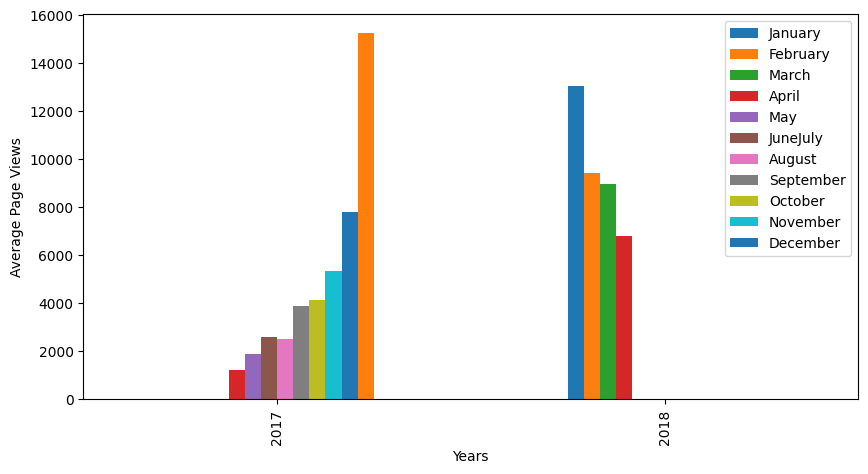

In [217]:
fig = df_bar1.plot.bar(legend=True , figsize = (10, 5), ylabel='Average Page Views', xlabel='Years')
plt.legend(['January','February','March',
            'April','May','June'
            'July','August', 'September',
            'October', 'November', 'December'])